In [2]:
import pandas as pd

In [135]:
df = pd.read_csv('interviste_trasposte2.csv', sep=';')

In [136]:
df.head()

,Genere,Età,1. Con quale frequenza utilizzi sgrassatori spray?,2. Quali sono i primi marchi che ti vengono in mente?,3. Quale sgrassatore utilizzi maggiormente e perché ti piace?,4. Nello spray che utilizzi quotidianamente c’è qualcosa che manca o che cambieresti?,"5. Tra prezzo profumazione ed efficacia, quale ti interessa di più?",6. Classifica tra i tre?,7. Utilizzi ricariche o prendi lo spray tutte le volte?,8. Cambi il marchio spesso?,9. Preferisci un prodotto universale o specifico,10. Dove preferisci acquistare?,"11. Facciamo questa intervista per ACE, conosce la linea spray?",12. C’è qualche bisogno non ricoperto dal mercato spray che proporresti?,NOTE
0,Donna,54,1,"Chanteclair, Ace","Chanteclair perchè mi piace, costa il giusto. ...",No va bene così,NaN,"Prezzo, efficacia, profumazione","Le conosco, e quando ci sono al supermercato l...",In genere lo stesso ma ogni tanto cambio,Se possibile universale ma di solito utilizzo ...,Supermercati,Li conosco e li ho utilizzati ma non utilizzo ...,No,NaN
1,Donna,20,3,Conad,Conad per l'efficacia,Cambierei la profumazione più odore di pulito,NaN,"Prezzo,profumazione,efficacia",Non le conosco ma nonostante adesso ne sono a ...,Sempre lo stesso,Specifico,Supermercati,"Si li conosco, ma non li ho mai utilizzati. Li...","No, però gradirei uno sgrassatore universale a...",NaN
2,Uomo,20,1,"Smac, chanteclair",Chanteclair perchè mi piace ed è quello che mi...,L'unica osservazione che mi sento sento di dar...,NaN,"efficacia, prezzo, profumazione",Non conosco le ricarche e non utilizzerei per ...,"Non cambio, ma se non trovo chanteclair utiliz...",Universale,Supermercato,Per gli sgrassatori non lo conosco,No,NaN
3,Donna,35,7,"Chanteclair, Ajax, coop",chanteclair e amuchina (perchè ha un buon odor...,No,efficacia,"efficacia, profumazione, prezzo",Le conosco ma sono scomode,Sempre lo stesso (per ora),Universale,Supermercato,Non conosco la linea spray,/,NaN
4,Donna,33,3,"Amuchina,citrozil, coop, chanteclair",Amuchina li prendo quando sono in offerta,Cambierei il profumo. Li vorrei più profumati,NaN,"prezzo,efficacia,profumazione",Si le conosco e le prendo per evitare lo sprec...,Cambio in base alle offerte,Specifico,Supermercato,Non conosco la linea spray,/,NaN


In [137]:
#Colonna Note e 12
# Definisci una funzione per controllare la lunghezza della stringa
def check_length(val):
    return 1 if len(str(val)) > 4 else 0

# Applica la funzione alla colonna note (indice 14) e crea la nuova colonna note - binary
df['NOTE - binary'] = df['NOTE'].apply(check_length)

# Applica la funzione alla colonna 14 (indice 13) e crea la nuova colonna 15 (indice 14)
df['12 - binary'] = df.iloc[:, 13].apply(check_length)

In [138]:
#Domanda 10
# Definisci una funzione per controllare la presenza delle parole
def check_terms(val):
    val = str(val).lower()  # Converti il valore in stringa e in minuscolo
    has_upermerca = "upermerca" in val
    has_pecializzat = "pecializzat" in val

    if has_upermerca and has_pecializzat:
        return 3
    elif has_upermerca:
        return 1
    elif has_pecializzat:
        return 2
    else:
        return 0

# Applica la funzione alla colonna 12 (indice 11) e crea la nuova colonna "10 - binary"
df['10 - binary'] = df.iloc[:, 11].apply(check_terms)

In [139]:
#Domanda 9
# Definisci una funzione per controllare la presenza delle parole
def check_words(val):
    val = str(val).lower()  # Converti il valore in stringa e in minuscolo
    has_specific = "specific" in val
    has_universal = "universal" in val

    if has_specific and has_universal:
        return 2
    elif has_universal:
        return 1
    elif has_specific:
        return 0
    else:
        # Se nessuno dei termini è presente, puoi scegliere cosa fare.
        # Per esempio, puoi restituire un valore di default come None o 0.
        return None

# Applica la funzione alla colonna 11 (indice 10) e crea la nuova colonna "9 - binary_specifico_universale"
df['9 - binary_specifico_universale'] = df.iloc[:, 10].apply(check_words)


In [140]:
# Funzione per verificare la presenza di 'con candeggina' o 'senza candeggina'
def check_candeggina(val):
    val = str(val).lower()  # Converti il valore in stringa e in minuscolo
    has_con_candeggina = "con candeggina" in val
    has_senza_candeggina = "senza candeggina" in val

    if has_con_candeggina:
        return 1
    elif has_senza_candeggina:
        return 0
    else:
        # Se nessuno dei termini è presente, puoi scegliere cosa fare.
        # Per esempio, puoi restituire un valore di default come None o -1.
        return None

# Applica la funzione alla colonna 11 (indice 10) e crea la nuova colonna "9 - binary_candeggina"
df['9 - binary_candeggina'] = df.iloc[:, 10].apply(check_candeggina)

In [141]:
#Domanda 9
# Definisci una funzione per controllare la presenza della frase
def check_risciacquo(val):
    val = str(val).lower()  # Converti il valore in stringa e in minuscolo
    has_senza_risciacquo = "risciacquo" in val

    return 0 if has_senza_risciacquo else 1

# Applica la funzione alla colonna 11 (indice 10) e crea la nuova colonna "9 - risciacquo"
df['9 - risciacquo'] = df.iloc[:, 10].apply(check_risciacquo)

In [142]:
#Domanda 8
# Definisci una funzione per controllare la presenza delle parole
def check_offerte_sconti(val):
    val = str(val).lower()  # Converti il valore in stringa e in minuscolo
    return 1 if "offert" in val or "scont" in val else 0

# Applica la funzione alla colonna 10 (indice 9) e crea la nuova colonna "8 - binary_offerte"
df['8 - binary_offerte'] = df.iloc[:, 9].apply(check_offerte_sconti)

In [143]:
#Domanda 8
# Definisci una funzione per controllare la presenza della parola "stess"
def check_stess(val):
    val = str(val).lower()  # Converti il valore in stringa e in minuscolo
    return 0 if "stess" in val else 1

# Applica la funzione alla colonna 10 (indice 9) e crea la nuova colonna "8 - binary_cambia_prodotto"
df['8 - binary_cambia_prodotto'] = df.iloc[:, 9].apply(check_stess)

df.at[16, '8 - binary_cambia_prodotto'] = 1
df.at[38, '8 - binary_cambia_prodotto'] = 0
df.at[46, '8 - binary_cambia_prodotto'] = 0
df.at[48, '8 - binary_cambia_prodotto'] = 0
df.at[54, '8 - binary_cambia_prodotto'] = 0
df.at[61, '8 - binary_cambia_prodotto'] = 0
df.at[62, '8 - binary_cambia_prodotto'] = 0
df.at[63, '8 - binary_cambia_prodotto'] = 0
df.at[64, '8 - binary_cambia_prodotto'] = 0
df.at[65, '8 - binary_cambia_prodotto'] = 0
df.at[72, '8 - binary_cambia_prodotto'] = 0
df.at[73, '8 - binary_cambia_prodotto'] = 0
df.at[92, '8 - binary_cambia_prodotto'] = 0
df.at[103, '8 - binary_cambia_prodotto'] = 0
df.at[107, '8 - binary_cambia_prodotto'] = 0
df.at[110, '8 - binary_cambia_prodotto'] = 0
df.at[114, '8 - binary_cambia_prodotto'] = 0
df.at[121, '8 - binary_cambia_prodotto'] = 0

In [144]:
#domanda 6
# Funzione per convertire i valori della colonna 8 in numeri, considerando il secondo termine
def convert_second_term_to_number(phrase):
    # Divide la frase in base alle virgole e rimuove gli spazi bianchi
    if isinstance(phrase, str):
        # Divide la frase in base alle virgole e rimuove gli spazi bianchi
        terms = [term.strip() for term in phrase.split(',') if term.strip()]
        
    
        # Controlla se ci sono almeno due termini
        if len(terms) >= 3:
            third_term = terms[2].lower()
            if third_term == "efficacia":
                return 1
            elif third_term == "prezzo":
                return 2
            elif third_term == "profumazione":
                return 3
    # Gestisce i casi in cui non c'è un secondo termine o la frase non è formattata come previsto
    return 0  # o un altro valore di default

# Applica la funzione alla colonna 8 del DataFrame
df['5 - terza_caratteristica'] = df.iloc[:, 7].apply(convert_second_term_to_number)

In [145]:
#domanda 6
# Funzione per convertire i valori della colonna 8 in numeri, considerando il secondo termine
def convert_second_term_to_number(phrase):
    # Divide la frase in base alle virgole e rimuove gli spazi bianchi
    if isinstance(phrase, str):
        # Divide la frase in base alle virgole e rimuove gli spazi bianchi
        terms = [term.strip() for term in phrase.split(',') if term.strip()]
        
    
        # Controlla se ci sono almeno due termini
        if len(terms) >= 2:
            second_term = terms[1].lower()
            if second_term == "efficacia":
                return 1
            elif second_term == "prezzo":
                return 2
            elif second_term == "profumazione":
                return 3
    # Gestisce i casi in cui non c'è un secondo termine o la frase non è formattata come previsto
    return 0  # o un altro valore di default

# Applica la funzione alla colonna 8 del DataFrame
df['5 - seconda_caratteristica'] = df.iloc[:, 7].apply(convert_second_term_to_number)

In [146]:
#Domanda 5
# Funzione per convertire i valori della colonna 7 in numeri
def convert_criteria_to_number(criteria):
    if isinstance(criteria, str):
        criteria = criteria.strip().lower()  # Rimuove gli spazi e converte il testo in minuscolo
        if criteria == "efficacia":
            return 1
        elif criteria == "prezzo":
            return 2
        elif criteria == "profumazione":
            return 3
    return criteria

def convert_second_term_to_number(phrase):
    if isinstance(phrase, str):
        terms = [term.strip() for term in phrase.split(',') if term.strip()]
        if len(terms) >= 1:
            first_term = terms[0].lower()
            if first_term == "efficacia":
                return 1
            elif first_term == "prezzo":
                return 2
            elif first_term == "profumazione":
                return 3
    return 0

def decide_and_convert(row):
    if pd.notna(row.iloc[6]) and row.iloc[6].strip():  # Usa iloc per accedere ai valori per posizione
        return convert_criteria_to_number(row.iloc[6])
    else:
        return convert_second_term_to_number(row.iloc[7])

# Applica la funzione decide_and_convert a ciascuna riga del DataFrame
df['5 - caratteristica_preferita'] = df.apply(decide_and_convert, axis=1)

In [147]:
#domanda 4
import re  # Libreria per espressioni regolari

# Definisci una funzione per controllare se "no" compare come parola separata
def check_no(val):
    val = str(val).lower()  # Converti in minuscolo
    # Cerca "no" come parola separata
    return 0 if re.search(r'\bno\b', val) else 1

# Applica la funzione alla colonna 6 (indice 5) e crea la nuova colonna "4 - cambierei"
df['4 - cambierei'] = df.iloc[:, 5].apply(check_no)

In [148]:
#Domanda 2
# Lista dei prodotti per la pulizia della casa
prodotti_pulizia = [
    "Amuchina", "Vetril", "Ajax", "Chanteclair", "Lysoform", "Viakal", "Napisan"
    "Cif", "Svelto", "Dixan", "Pril", "Nelsen", "Ace", "Smac",
    "Mastro Lindo", "Fairy", "Winnies", "Swiffer", "Vim", "vert",
    "Omino Bianco", "Fornet", "Bio Presto", "Spuma di Sciampagna", "Calgon", "Chiaro luce", "Quazar"
]

# Lista dei supermercati
supermercati = ["Conad", "Coop", "Esselunga", "Pam", "Lidl", "supermercati", "Maury's"]

import string
import re

def normalizza_testo(testo):
    # Sostituisce la punteggiatura con spazi
    testo = testo.translate(str.maketrans(string.punctuation, ' ' * len(string.punctuation)))
    # Rimuove spazi extra
    testo = re.sub(r'\s+', ' ', testo).strip()
    return testo.lower()

def crea_colonne_marche(df, nome_colonna_testo, marche):
    # Normalizza le marche
    marche_normalizzate = {normalizza_testo(marca): marca for marca in marche}

    # Crea quattro nuove colonne per inserire i marchi trovati
    for i in range(4):
        df[f'Marchi_Trovati_{i+1}'] = ''

    for index, row in df.iterrows():
        testo = normalizza_testo(row[nome_colonna_testo]) if isinstance(row[nome_colonna_testo], str) else ""
        marchi_trovati = []

        # Cerca ogni marca nel testo
        for parola_normalizzata in testo.split():
            for marca_normalizzata, marca_originale in marche_normalizzate.items():
                if marca_normalizzata in parola_normalizzata:
                    marchi_trovati.append(marca_originale)
                    break

        # Rimuove i duplicati mantenendo l'ordine
        marchi_unico = []
        for marca in marchi_trovati:
            if marca not in marchi_unico:
                marchi_unico.append(marca)

        # Suddivide i marchi trovati nelle quattro colonne
        for i in range(min(4, len(marchi_unico))):
            df.at[index, f'Marchi_Trovati_{i+1}'] = marchi_unico[i]


# Combina prodotti e supermercati
marche_totali = prodotti_pulizia + supermercati

# Nome della colonna che contiene il testo da analizzare
nome_colonna_testo = df.columns[3]  # Sostituisci con il nome effettivo della colonna

# Applica la funzione al DataFrame
crea_colonne_marche(df, nome_colonna_testo, marche_totali)


In [149]:
# Funzione per assegnare un valore in base all'età
def assign_age_group(age):
    try:
        age = int(age)  # Converte l'età in un intero
        if 63 <= age:
            return 3
        elif 44 <= age < 63:
            return 2
        elif 27 <= age < 44:
            return 1
        elif 18 <= age < 27:
            return 0
        else:
            return None  # o un altro valore per età fuori dai range specificati
    except ValueError:
        return None  # Gestisce i casi in cui l'età non è convertibile in intero

# Applica la funzione alla seconda colonna del DataFrame
df['Età: generazioni'] = df.iloc[:, 1].apply(assign_age_group)

In [150]:
#Domanda Sesso (0)
# Funzione per applicare la logica di conversione con normalizzazione del testo
def convert_gender_to_number(gender):
    # Controlla se il valore è una stringa
    if isinstance(gender, str):
        gender = gender.strip().lower()  # Rimuove gli spazi e converte il testo in minuscolo
        if gender == "donna":
            return 0
        elif gender == "uomo":
            return 1
    # Gestisce i valori non-stringa (come NaN)
    return None  # o un altro valore di default

# Applica la funzione alla colonna "Genere"
df['Sesso'] = df['Genere'].apply(convert_gender_to_number)

In [151]:
df.head()

,Genere,Età,1. Con quale frequenza utilizzi sgrassatori spray?,2. Quali sono i primi marchi che ti vengono in mente?,3. Quale sgrassatore utilizzi maggiormente e perché ti piace?,4. Nello spray che utilizzi quotidianamente c’è qualcosa che manca o che cambieresti?,"5. Tra prezzo profumazione ed efficacia, quale ti interessa di più?",6. Classifica tra i tre?,7. Utilizzi ricariche o prendi lo spray tutte le volte?,8. Cambi il marchio spesso?,...,5 - terza_caratteristica,5 - seconda_caratteristica,5 - caratteristica_preferita,4 - cambierei,Marchi_Trovati_1,Marchi_Trovati_2,Marchi_Trovati_3,Marchi_Trovati_4,Età: generazioni,Sesso
0,Donna,54,1,"Chanteclair, Ace","Chanteclair perchè mi piace, costa il giusto. ...",No va bene così,NaN,"Prezzo, efficacia, profumazione","Le conosco, e quando ci sono al supermercato l...",In genere lo stesso ma ogni tanto cambio,...,3,1,2,0,Chanteclair,Ace,,,2.0,0.0
1,Donna,20,3,Conad,Conad per l'efficacia,Cambierei la profumazione più odore di pulito,NaN,"Prezzo,profumazione,efficacia",Non le conosco ma nonostante adesso ne sono a ...,Sempre lo stesso,...,1,3,2,1,Conad,,,,0.0,0.0
2,Uomo,20,1,"Smac, chanteclair",Chanteclair perchè mi piace ed è quello che mi...,L'unica osservazione che mi sento sento di dar...,NaN,"efficacia, prezzo, profumazione",Non conosco le ricarche e non utilizzerei per ...,"Non cambio, ma se non trovo chanteclair utiliz...",...,3,2,1,1,Smac,Chanteclair,,,0.0,1.0
3,Donna,35,7,"Chanteclair, Ajax, coop",chanteclair e amuchina (perchè ha un buon odor...,No,efficacia,"efficacia, profumazione, prezzo",Le conosco ma sono scomode,Sempre lo stesso (per ora),...,2,3,1,0,Chanteclair,Ajax,Coop,,1.0,0.0
4,Donna,33,3,"Amuchina,citrozil, coop, chanteclair",Amuchina li prendo quando sono in offerta,Cambierei il profumo. Li vorrei più profumati,NaN,"prezzo,efficacia,profumazione",Si le conosco e le prendo per evitare lo sprec...,Cambio in base alle offerte,...,3,1,2,1,Amuchina,Coop,Chanteclair,,1.0,0.0


In [152]:
#show all the values in the 7th column
df.iloc[:, 6].unique()

array([nan, 'efficacia', 'prezzo', 'profumazione', 'Efficacia',
       'Profumazione', 'Prezzo'], dtype=object)

In [153]:
df.to_csv('interviste_trasposte_prova2.csv', index=False)

In [2]:
import pandas as pd
df = pd.read_csv('interviste_trasposte_prova.csv', sep=';')

In [3]:
df.columns

Index(['Genere', 'Età',
       '1.      Con quale frequenza utilizzi sgrassatori spray?',
       '2.      Quali sono i primi marchi che ti vengono in mente?',
       '3.      Quale sgrassatore utilizzi maggiormente e perché ti piace?',
       '4.      Nello spray che utilizzi quotidianamente c’è qualcosa che manca o che cambieresti?',
       '5.      Tra prezzo profumazione ed efficacia, quale ti interessa di più?',
       '6.      Classifica tra i tre?',
       '7.      Utilizzi ricariche o prendi lo spray tutte le volte?',
       '8. Cambi il marchio spesso?',
       '9.      Preferisci un prodotto universale o specifico',
       '10.      Dove preferisci acquistare?',
       '11.      Facciamo questa intervista per ACE, conosce la linea spray?',
       '12.      C’è qualche bisogno non ricoperto dal mercato spray che proporresti?',
       'NOTE', 'NOTE - binary', '12 - binary', '10 - binary',
       '9 - binary_specifico_universale', '9 - binary_candeggina',
       '9 - risciacquo',

In [13]:
df.head()

,Genere,Età,1. Con quale frequenza utilizzi sgrassatori spray?,2. Quali sono i primi marchi che ti vengono in mente?,3. Quale sgrassatore utilizzi maggiormente e perché ti piace?,4. Nello spray che utilizzi quotidianamente c’è qualcosa che manca o che cambieresti?,"5. Tra prezzo profumazione ed efficacia, quale ti interessa di più?",6. Classifica tra i tre?,7. Utilizzi ricariche o prendi lo spray tutte le volte?,8. Cambi il marchio spesso?,...,5 - terza_caratteristica,5 - seconda_caratteristica,5 - caratteristica_preferita,4 - cambierei,Marchi_Trovati_1,Marchi_Trovati_2,Marchi_Trovati_3,Marchi_Trovati_4,Età: generazioni,Sesso
0,Donna,54,1,"Chanteclair, Ace","Chanteclair perchè mi piace, costa il giusto. ...",No va bene così,NaN,"Prezzo, efficacia, profumazione","Le conosco, e quando ci sono al supermercato l...",In genere lo stesso ma ogni tanto cambio,...,3,1,2,0,Chanteclair,Ace,NaN,NaN,2.0,0.0
1,Donna,20,3,Conad,Conad per l'efficacia,Cambierei la profumazione più odore di pulito,NaN,"Prezzo,profumazione,efficacia",Non le conosco ma nonostante adesso ne sono a ...,Sempre lo stesso,...,1,3,2,1,Conad,NaN,NaN,NaN,0.0,0.0
2,Uomo,20,1,"Smac, chanteclair",Chanteclair perchè mi piace ed è quello che mi...,L'unica osservazione che mi sento sento di dar...,NaN,"efficacia, prezzo, profumazione",Non conosco le ricarche e non utilizzerei per ...,"Non cambio, ma se non trovo chanteclair utiliz...",...,3,2,1,1,Smac,Chanteclair,NaN,NaN,0.0,1.0
3,Donna,35,7,"Chanteclair, Ajax, coop",chanteclair e amuchina (perchè ha un buon odor...,No,efficacia,"efficacia, profumazione, prezzo",Le conosco ma sono scomode,Sempre lo stesso (per ora),...,2,3,1,0,Chanteclair,Ajax,Coop,NaN,1.0,0.0
4,Donna,33,3,"Amuchina,citrozil, coop, chanteclair",Amuchina li prendo quando sono in offerta,Cambierei il profumo. Li vorrei più profumati,NaN,"prezzo,efficacia,profumazione",Si le conosco e le prendo per evitare lo sprec...,Cambio in base alle offerte,...,3,1,2,1,Amuchina,Coop,Chanteclair,NaN,1.0,0.0


In [14]:
# Supponendo che il DataFrame df sia già definito e disponibile

# Lista delle colonne da mantenere
colonne_da_mantenere = [
    'Età: generazioni', 'Sesso', 'NOTE - binary', '12 - binary', '10 - binary',
    '9 - binary_specifico_universale', '9 - binary_candeggina', '9 - risciacquo',
    '8 - binary_offerte', '8 - binary_cambia_prodotto', '5 - terza_caratteristica',
    '5 - seconda_caratteristica', '5 - caratteristica_preferita', '4 - cambierei',
    'Marchi_Trovati_1', 'Marchi_Trovati_2', 'Marchi_Trovati_3', 'Marchi_Trovati_4',
]

# Ora puoi usare questa lista per filtrare il DataFrame
df1 = df[colonne_da_mantenere]

# Ottenere i nomi delle colonne basandosi sugli indici
nome_colonna_3 = df.columns[4]  # Indice 4 per la terza domanda

# Aggiungi questi nomi alla tua lista di colonne da mantenere
colonne_da_mantenere.extend([nome_colonna_3])

# Ora puoi usare questa lista per filtrare il DataFrame
df_filtrato_testuale = df[colonne_da_mantenere]

df1.head()  # Visualizza le prime righe del DataFrame

,Età: generazioni,Sesso,NOTE - binary,12 - binary,10 - binary,9 - binary_specifico_universale,9 - binary_candeggina,9 - risciacquo,8 - binary_offerte,8 - binary_cambia_prodotto,5 - terza_caratteristica,5 - seconda_caratteristica,5 - caratteristica_preferita,4 - cambierei,Marchi_Trovati_1,Marchi_Trovati_2,Marchi_Trovati_3,Marchi_Trovati_4
0,2.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,3,1,2,0,Chanteclair,Ace,NaN,NaN
1,0.0,0.0,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,1,3,2,1,Conad,NaN,NaN,NaN
2,0.0,1.0,0.0,0.0,1.0,1.0,NaN,1.0,0.0,1.0,3,2,1,1,Smac,Chanteclair,NaN,NaN
3,1.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0,0.0,0.0,2,3,1,0,Chanteclair,Ajax,Coop,NaN
4,1.0,0.0,0.0,0.0,1.0,0.0,NaN,1.0,1.0,1.0,3,1,2,1,Amuchina,Coop,Chanteclair,NaN


In [15]:
print(df_filtrato_testuale.head())
df_filtrato_testuale.to_csv('prova_cambiomarchio.csv', index=False)

   Età: generazioni  Sesso  NOTE - binary  12 - binary  10 - binary  \
0               2.0    0.0            0.0          0.0          1.0   
1               0.0    0.0            0.0          1.0          1.0   
2               0.0    1.0            0.0          0.0          1.0   
3               1.0    0.0            0.0          0.0          1.0   
4               1.0    0.0            0.0          0.0          1.0   

   9 - binary_specifico_universale  9 - binary_candeggina  9 - risciacquo  \
0                              2.0                    0.0             1.0   
1                              0.0                    NaN             1.0   
2                              1.0                    NaN             1.0   
3                              1.0                    NaN             1.0   
4                              0.0                    NaN             1.0   

   8 - binary_offerte  8 - binary_cambia_prodotto  5 - terza_caratteristica  \
0                 0.0          

In [ ]:
df = df1

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def crea_grafico_conteggi(df, colonna, titolo_grafico):
    # Calcolo dei conteggi
    conteggi = df.groupby(['Età: generazioni', colonna]).size().reset_index(name='Conteggio')

    # Sostituzione dei valori numerici con le etichette corrispondenti
    conteggi[colonna] = conteggi[colonna].replace({0: 'No', 1: 'Si'})
    conteggi['Età: generazioni'] = conteggi['Età: generazioni'].replace({
        0.0: 'GenZ', 1.0: 'GenY', 2.0: 'GenX', 3.0: 'BabyBoomers'
    })

    # Creazione del grafico a barre affiancate
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Età: generazioni', y='Conteggio', hue=colonna, data=conteggi, palette="viridis")
    plt.title(titolo_grafico)
    plt.ylabel('Conteggio')
    plt.xlabel('Età: Generazioni')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Visualizzazione del grafico
    plt.show()

    # Restituzione del DataFrame dei conteggi
    return conteggi

# Uso della funzione
conteggi_bisogni = crea_grafico_conteggi(df, 'Sesso', 'Comparazione della distribuzione del genere per Categoria di Età: Generazioni')

In [ ]:
def crea_grafico_conteggi(df, colonna, titolo_grafico):
    # Calcolo dei conteggi
    conteggi = df.groupby(['Età: generazioni', colonna]).size().reset_index(name='Conteggio')

    # Sostituzione dei valori numerici con le etichette corrispondenti
    conteggi[colonna] = conteggi[colonna].replace({0: 'No', 1: 'Si'})
    conteggi['Età: generazioni'] = conteggi['Età: generazioni'].replace({
        0.0: 'GenZ', 1.0: 'GenY', 2.0: 'GenX', 3.0: 'BabyBoomers'
    })

    # Creazione del grafico a barre affiancate
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Età: generazioni', y='Conteggio', hue=colonna, data=conteggi, palette="viridis")
    plt.title(titolo_grafico)
    plt.ylabel('Conteggio')
    plt.xlabel('Età: Generazioni')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Visualizzazione del grafico
    plt.show()

    # Restituzione del DataFrame dei conteggi
    return conteggi

# Uso della funzione
conteggi_bisogni = crea_grafico_conteggi(df, 'NOTE - binary', 'Comparazione della scrittura di note scritte per Categoria di Età: Generazioni')


In [ ]:
def crea_grafico_conteggi(df, colonna, titolo_grafico):
    # Calcolo dei conteggi
    conteggi = df.groupby(['Età: generazioni', colonna]).size().reset_index(name='Conteggio')

    # Sostituzione dei valori numerici con le etichette corrispondenti
    conteggi[colonna] = conteggi[colonna].replace({0: 'No', 1: 'Si'})
    conteggi['Età: generazioni'] = conteggi['Età: generazioni'].replace({
        0.0: 'GenZ', 1.0: 'GenY', 2.0: 'GenX', 3.0: 'BabyBoomers'
    })

    # Creazione del grafico a barre affiancate
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Età: generazioni', y='Conteggio', hue=colonna, data=conteggi, palette="viridis")
    plt.title(titolo_grafico)
    plt.ylabel('Conteggio')
    plt.xlabel('Età: Generazioni')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Visualizzazione del grafico
    plt.show()

    # Restituzione del DataFrame dei conteggi
    return conteggi

# Uso della funzione
conteggi_bisogni = crea_grafico_conteggi(df, '12 - binary', 'Comparazione della scrittura di bisogni non coperti per Categoria di Età: Generazioni')

In [ ]:
def crea_grafico_conteggi(df, colonna, titolo_grafico):
    # Calcolo dei conteggi
    conteggi = df.groupby(['Età: generazioni', colonna]).size().reset_index(name='Conteggio')

    # Sostituzione dei valori numerici con le etichette corrispondenti
    conteggi[colonna] = conteggi[colonna].replace({0: 'Nessuno', 1: 'Supermercato', 2: 'Specializzato', 3: 'Entrambi'})
    conteggi['Età: generazioni'] = conteggi['Età: generazioni'].replace({
        0.0: 'GenZ', 1.0: 'GenY', 2.0: 'GenX', 3.0: 'BabyBoomers'
    })

    # Creazione del grafico a barre affiancate
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Età: generazioni', y='Conteggio', hue=colonna, data=conteggi, palette="viridis")
    plt.title(titolo_grafico)
    plt.ylabel('Conteggio')
    plt.xlabel('Età: Generazioni')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Visualizzazione del grafico
    plt.show()

    # Restituzione del DataFrame dei conteggi
    return conteggi

# Uso della funzione
conteggi_bisogni = crea_grafico_conteggi(df, '10 - binary', 'Comparazione della scelta del luogo di acquisto per Categoria di Età: Generazioni')

In [ ]:
def crea_grafico_conteggi(df, colonna, titolo_grafico):
    # Calcolo dei conteggi
    conteggi = df.groupby(['Età: generazioni', colonna]).size().reset_index(name='Conteggio')

    # Sostituzione dei valori numerici con le etichette corrispondenti
    conteggi[colonna] = conteggi[colonna].replace({0: 'Specifico', 1: 'Universale', 2: 'Entrambi'})
    conteggi['Età: generazioni'] = conteggi['Età: generazioni'].replace({
        0.0: 'GenZ', 1.0: 'GenY', 2.0: 'GenX', 3.0: 'BabyBoomers'
    })

    # Creazione del grafico a barre affiancate
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Età: generazioni', y='Conteggio', hue=colonna, data=conteggi, palette="viridis")
    plt.title(titolo_grafico)
    plt.ylabel('Conteggio')
    plt.xlabel('Età: Generazioni')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Visualizzazione del grafico
    plt.show()

    # Restituzione del DataFrame dei conteggi
    return conteggi

# Uso della funzione
conteggi_bisogni = crea_grafico_conteggi(df, '9 - binary_specifico_universale', 'Comparazione della preferenza tra prodotti universali e generici per Categoria di Età: Generazioni')

In [ ]:
def crea_grafico_conteggi(df, colonna, titolo_grafico):
    # Calcolo dei conteggi
    conteggi = df.groupby(['Età: generazioni', colonna]).size().reset_index(name='Conteggio')

    # Sostituzione dei valori numerici con le etichette corrispondenti
    conteggi[colonna] = conteggi[colonna].replace({0: 'Senza candeggina', 1: 'Con candeggina'})
    conteggi['Età: generazioni'] = conteggi['Età: generazioni'].replace({
        0.0: 'GenZ', 1.0: 'GenY', 2.0: 'GenX', 3.0: 'BabyBoomers'
    })

    # Creazione del grafico a barre affiancate
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Età: generazioni', y='Conteggio', hue=colonna, data=conteggi, palette="viridis")
    plt.title(titolo_grafico)
    plt.ylabel('Conteggio')
    plt.xlabel('Età: Generazioni')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Visualizzazione del grafico
    plt.show()

    # Restituzione del DataFrame dei conteggi
    return conteggi

# Uso della funzione
conteggi_bisogni = crea_grafico_conteggi(df, '9 - binary_candeggina', 'Comparazione della preferenza tra prodotti con candeggina e senza per Categoria di Età: Generazioni')

In [ ]:
def crea_grafico_conteggi_senza_risciacquo(df, colonna, titolo_grafico):
    # Filtra il DataFrame per includere solo le righe con 'Senza risciacquo'
    df_filtrato = df[df[colonna] == 0]

    # Calcolo dei conteggi
    conteggi = df_filtrato.groupby(['Età: generazioni']).size().reset_index(name='Conteggio')

    # Sostituzione dei valori numerici con le etichette corrispondenti per 'Età: generazioni'
    conteggi['Età: generazioni'] = conteggi['Età: generazioni'].replace({
        0.0: 'GenZ', 1.0: 'GenY', 2.0: 'GenX', 3.0: 'BabyBoomers'
    })

    # Creazione del grafico a barre
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Età: generazioni', y='Conteggio', data=conteggi, palette="viridis")
    plt.title(titolo_grafico)
    plt.ylabel('Conteggio Senza Risciacquo')
    plt.xlabel('Età: Generazioni')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Visualizzazione del grafico
    plt.show()

    # Restituzione del DataFrame dei conteggi
    return conteggi

# Uso della funzione
conteggi_senza_risciacquo = crea_grafico_conteggi_senza_risciacquo(df, '9 - risciacquo', 'Comparazione della preferenza per prodotti senza risciacquo per Categoria di Età: Generazioni')

In [ ]:
type(df)

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.columns

In [ ]:
# Lista delle colonne da analizzare escludendo 'Età: generazioni'
colonne_da_analizzare = df.columns.drop('Età: generazioni')

# Creazione di una lista per memorizzare i risultati
risultati = []

for colonna in colonne_da_analizzare:
    conteggio = df.groupby('Età: generazioni')[colonna].value_counts().unstack(fill_value=0)
    conteggio.columns = [f"{colonna}_{val}" for val in conteggio.columns]
    risultati.append(conteggio)

# Combinare tutti i DataFrame in un unico DataFrame
tabella_riassuntiva_df = pd.concat(risultati, axis=1)

print(tabella_riassuntiva_df)

In [ ]:
#aggiungi a tabella_riassuntiva_df la colonna Età: generazioni
tabella_riassuntiva_df['Età: generazioni'] = ['GenZ', 'GenY', 'GenX', 'BabyBoomers']
#metti la colonna Età: generazioni come prima colonna
tabella_riassuntiva_df = tabella_riassuntiva_df[['Età: generazioni'] + [col for col in tabella_riassuntiva_df.columns if col != 'Età: generazioni']]

In [ ]:
tabella_riassuntiva_df.to_csv('tabella_riassuntiva.csv', index=False)

QUI SCARICO UN NUOVO CSV

In [1]:
import pandas as pd
df = pd.read_csv('tabella_riassuntiva_modificata.csv', sep=';')

In [128]:
df.columns

Index(['Età: generazioni', 'Donna', 'Uomo', 'Non ha scritto note',
       'Ha scritto note', 'Non ha individuato un bisogno',
       'Ha individuato un bisogno', 'Non specifica dove acquista',
       'Acquista al supermercato', 'Acquista nei rivenditori specializzati',
       'Acquista da entrambi', 'Usa prodotti specifici',
       'Usa prodotti universali', 'Usa entrambi i tipi di prodotti',
       'Preferisce prodotti senza candeggina',
       'Preferisce prodotti con candeggina',
       'Ha espresso preferenza per prodotti con risciacquo in modo autonomo',
       'Non ha espresso preferenza per prodotti con risciacquo in modo autonomo',
       'Non ha citato il cambio di preferenze in base all’offerta',
       'Ha citato il cambio di preferenza in base all’offerta',
       'Usa sempre lo stesso prodotto', 'Cambia prodotto',
       'Non ha espresso una terza preferenza per il prodotto',
       'La terza caratteristica preferita è l’efficacia',
       'La terza caratteristica preferit

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Funzione per creare e mostrare un grafico a barre affiancate per ogni riga
def crea_grafico_confronto_righe(df, variabile1, variabile2, label_x, label_y):
    # Estrai le etichette per l'asse X dalla prima colonna del DataFrame
    etichette_x = df.iloc[:, 0]

    # Numero di righe nel DataFrame
    num_righe = df.shape[0]
    ind = np.arange(num_righe)  # Indici per il posizionamento delle barre
    width = 0.35  # Larghezza delle barre

    # Crea il grafico a barre
    plt.figure(figsize=(12, 6))  # Dimensione aggiustata per una migliore visualizzazione
    plt.bar(ind - width/2, df[variabile1], width, label=variabile1)
    plt.bar(ind + width/2, df[variabile2], width, label=variabile2)

    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.title(f'Confronto tra {variabile1} e {variabile2}')
    plt.xticks(ind, etichette_x, rotation=45)
    plt.legend(loc='best')
    plt.tight_layout()  # Aggiunge spazio per evitare il sovraffollamento degli elementi
    plt.show()

# Chiamata alla funzione per creare il grafico
crea_grafico_confronto_righe(df, 'Donna', 'Uomo', 'Categoria', 'Valore')


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Funzione per creare e mostrare un grafico a barre affiancate per ogni riga
def crea_grafico_confronto_righe(df, variabile1, variabile2, label_x, label_y):
    # Estrai le etichette per l'asse X dalla prima colonna del DataFrame
    etichette_x = df.iloc[:, 0]

    # Numero di righe nel DataFrame
    num_righe = df.shape[0]
    ind = np.arange(num_righe)  # Indici per il posizionamento delle barre
    width = 0.35  # Larghezza delle barre

    # Crea il grafico a barre
    plt.figure(figsize=(12, 6))  # Dimensione aggiustata per una migliore visualizzazione
    plt.bar(ind - width/2, df[variabile1], width, label=variabile1)
    plt.bar(ind + width/2, df[variabile2], width, label=variabile2)

    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.title(f'Confronto tra {variabile1} e {variabile2}')
    plt.xticks(ind, etichette_x, rotation=45)
    plt.legend(loc='best')
    plt.tight_layout()  # Aggiunge spazio per evitare il sovraffollamento degli elementi
    plt.show()

# Chiamata alla funzione per creare il grafico
crea_grafico_confronto_righe(df, 'Non ha individuato un bisogno', 'Ha individuato un bisogno', 'Categoria', 'Valore')


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Funzione per creare e mostrare un grafico a barre affiancate per ogni riga
def crea_grafico_confronto_righe(df, variabile1, variabile2, label_x, label_y):
    # Estrai le etichette per l'asse X dalla prima colonna del DataFrame
    etichette_x = df.iloc[:, 0]

    # Numero di righe nel DataFrame
    num_righe = df.shape[0]
    ind = np.arange(num_righe)  # Indici per il posizionamento delle barre
    width = 0.35  # Larghezza delle barre

    # Crea il grafico a barre
    plt.figure(figsize=(12, 6))  # Dimensione aggiustata per una migliore visualizzazione
    plt.bar(ind - width/2, df[variabile1], width, label=variabile1)
    plt.bar(ind + width/2, df[variabile2], width, label=variabile2)

    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.title(f'Confronto tra {variabile1} e {variabile2}')
    plt.xticks(ind, etichette_x, rotation=45)
    plt.legend(loc='best')
    plt.tight_layout()  # Aggiunge spazio per evitare il sovraffollamento degli elementi
    plt.show()

# Chiamata alla funzione per creare il grafico
crea_grafico_confronto_righe(df, 'Preferisce prodotti senza candeggina', 'Preferisce prodotti con candeggina', 'Categoria', 'Valore')


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Funzione per creare e mostrare un grafico a barre raggruppate per ogni riga
def crea_grafico_confronto_multi_variabili(df, variabili, label_x, label_y):
    # Estrai le etichette per l'asse X dalla prima colonna del DataFrame
    etichette_x = df.iloc[:, 0]

    # Numero di righe e numero di variabili
    num_righe = df.shape[0]
    num_variabili = len(variabili)
    ind = np.arange(num_righe)  # Indici per il posizionamento delle barre
    width = 0.2  # Larghezza delle barre, regolabile per adattarsi al numero di variabili

    # Crea il grafico a barre
    plt.figure(figsize=(14, 6))  # Regola le dimensioni per adattarsi al numero di barre
    for i, variabile in enumerate(variabili):
        plt.bar(ind + i * width, df[variabile], width, label=variabile)

    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.title('Confronto tra Diverse Variabili per Ogni Riga')
    plt.xticks(ind + width * (num_variabili / 2 - 0.5), etichette_x, rotation=45)
    plt.legend(loc='best')
    plt.tight_layout()  # Aggiunge spazio per evitare il sovraffollamento degli elementi
    plt.show()

# Lista delle variabili da confrontare
variabili = [
    "Non specifica dove acquista", 
    "Acquista al supermercato", 
    "Acquista nei rivenditori specializzati", 
    "Acquista da entrambi"
]

# Chiamata alla funzione per creare il grafico
crea_grafico_confronto_multi_variabili(df, variabili, 'Categoria', 'Valore')


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Funzione per creare e mostrare un grafico a barre raggruppate per ogni riga
def crea_grafico_confronto_multi_variabili(df, variabili, label_x, label_y):
    # Estrai le etichette per l'asse X dalla prima colonna del DataFrame
    etichette_x = df.iloc[:, 0]

    # Numero di righe e numero di variabili
    num_righe = df.shape[0]
    num_variabili = len(variabili)
    ind = np.arange(num_righe)  # Indici per il posizionamento delle barre
    width = 0.2  # Larghezza delle barre, regolabile per adattarsi al numero di variabili

    # Crea il grafico a barre
    plt.figure(figsize=(14, 6))  # Regola le dimensioni per adattarsi al numero di barre
    for i, variabile in enumerate(variabili):
        plt.bar(ind + i * width, df[variabile], width, label=variabile)

    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.title('Confronto tra Diverse Variabili per Ogni Riga')
    plt.xticks(ind + width * (num_variabili / 2 - 0.5), etichette_x, rotation=45)
    plt.legend(loc='best')
    plt.tight_layout()  # Aggiunge spazio per evitare il sovraffollamento degli elementi
    plt.show()

# Lista delle variabili da confrontare
variabili = [
    "Usa prodotti specifici", 
    "Usa prodotti universali", 
    "Usa entrambi i tipi di prodotti"
]

# Chiamata alla funzione per creare il grafico
crea_grafico_confronto_multi_variabili(df, variabili, 'Categoria', 'Valore')


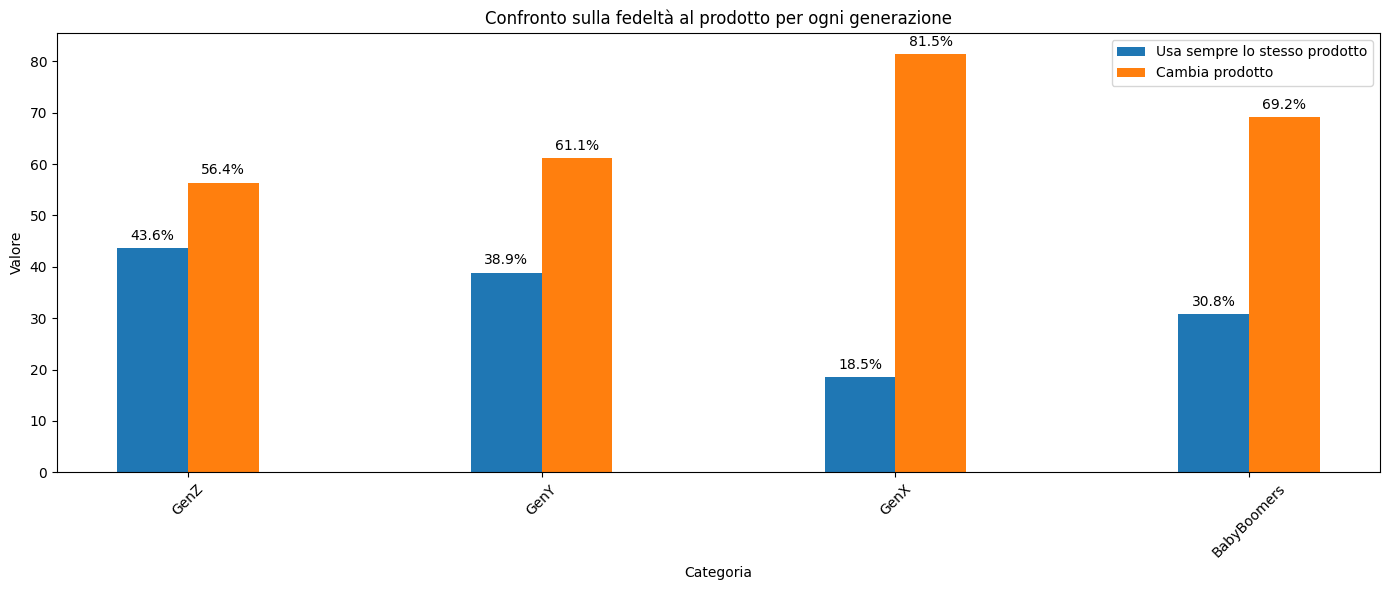

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Funzione per creare e mostrare un grafico a barre raggruppate in percentuale per ogni riga
def crea_grafico_confronto_multi_variabili(df, variabili, label_x, label_y):
    # Estrai le etichette per l'asse X dalla prima colonna del DataFrame
    etichette_x = df.iloc[:, 0]

    # Calcolo delle percentuali per le variabili
    df_percentuale = df[variabili].div(df[variabili].sum(axis=1), axis=0) * 100

    # Numero di righe e numero di variabili
    num_righe = df.shape[0]
    num_variabili = len(variabili)
    ind = np.arange(num_righe)  # Indici per il posizionamento delle barre
    width = 0.2  # Larghezza delle barre, regolabile per adattarsi al numero di variabili

    # Crea il grafico a barre
    plt.figure(figsize=(14, 6))  # Regola le dimensioni per adattarsi al numero di barre
    for i, variabile in enumerate(variabili):
        plt.bar(ind + i * width, df_percentuale[variabile], width, label=variabile)

    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.title('Confronto sulla fedeltà al prodotto per ogni generazione')
    plt.xticks(ind + width * (num_variabili / 2 - 0.5), etichette_x, rotation=45)
    plt.legend(loc='best')
    plt.tight_layout()  # Aggiunge spazio per evitare il sovraffollamento degli elementi

    # Aggiungi le etichette di percentuale sopra le barre
    for i in ind:
        for j in range(num_variabili):
            valore = df_percentuale.iloc[i, j]
            plt.text(i + j * width, valore + 1, f'{valore:.1f}%', ha='center', va='bottom')
    
    plt.show()

# Lista delle variabili da confrontare
variabili = [
    "Usa sempre lo stesso prodotto",  
    "Cambia prodotto"
]

# Chiamata alla funzione per creare il grafico
crea_grafico_confronto_multi_variabili(df, variabili, 'Categoria', 'Valore')


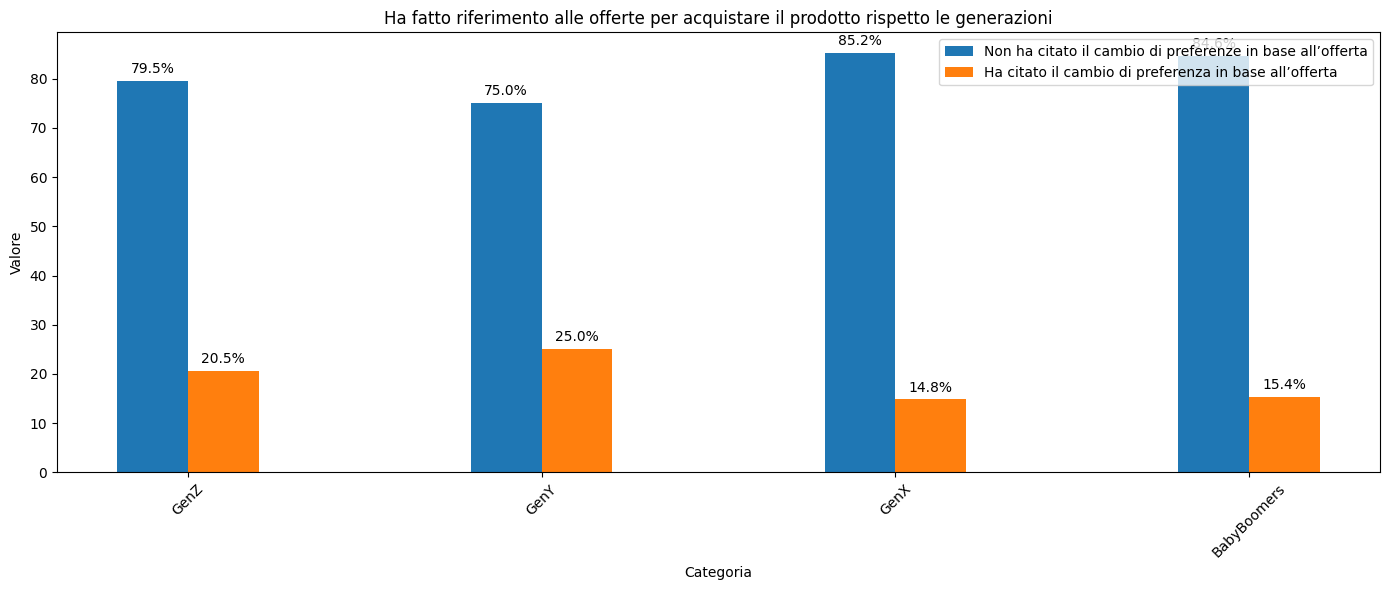

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Funzione per creare e mostrare un grafico a barre raggruppate in percentuale per ogni riga
def crea_grafico_confronto_multi_variabili(df, variabili, label_x, label_y):
    # Estrai le etichette per l'asse X dalla prima colonna del DataFrame
    etichette_x = df.iloc[:, 0]

    # Calcolo delle percentuali per le variabili
    df_percentuale = df[variabili].div(df[variabili].sum(axis=1), axis=0) * 100

    # Numero di righe e numero di variabili
    num_righe = df.shape[0]
    num_variabili = len(variabili)
    ind = np.arange(num_righe)  # Indici per il posizionamento delle barre
    width = 0.2  # Larghezza delle barre, regolabile per adattarsi al numero di variabili

    # Crea il grafico a barre
    plt.figure(figsize=(14, 6))  # Regola le dimensioni per adattarsi al numero di barre
    for i, variabile in enumerate(variabili):
        plt.bar(ind + i * width, df_percentuale[variabile], width, label=variabile)

    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.title('Ha fatto riferimento alle offerte per acquistare il prodotto rispetto le generazioni')
    plt.xticks(ind + width * (num_variabili / 2 - 0.5), etichette_x, rotation=45)
    plt.legend(loc='best')
    plt.tight_layout()  # Aggiunge spazio per evitare il sovraffollamento degli elementi
    
    # Aggiungi le etichette di percentuale sopra le barre
    for i in ind:
        for j in range(num_variabili):
            valore = df_percentuale.iloc[i, j]
            plt.text(i + j * width, valore + 1, f'{valore:.1f}%', ha='center', va='bottom')

    plt.show()


# Lista delle variabili da confrontare
variabili = [
    'Non ha citato il cambio di preferenze in base all’offerta',
    'Ha citato il cambio di preferenza in base all’offerta'
]

# Chiamata alla funzione per creare il grafico
crea_grafico_confronto_multi_variabili(df, variabili, 'Categoria', 'Valore')


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Funzione per creare e mostrare un grafico a barre raggruppate per ogni riga
def crea_grafico_confronto_multi_variabili(df, variabili, label_x, label_y):
    # Estrai le etichette per l'asse X dalla prima colonna del DataFrame
    etichette_x = df.iloc[:, 0]

    # Numero di righe e numero di variabili
    num_righe = df.shape[0]
    num_variabili = len(variabili)
    ind = np.arange(num_righe)  # Indici per il posizionamento delle barre
    width = 0.2  # Larghezza delle barre, regolabile per adattarsi al numero di variabili

    # Crea il grafico a barre
    plt.figure(figsize=(14, 6))  # Regola le dimensioni per adattarsi al numero di barre
    for i, variabile in enumerate(variabili):
        plt.bar(ind + i * width, df[variabile], width, label=variabile)

    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.title('Confronto tra Diverse Variabili per Ogni Riga')
    plt.xticks(ind + width * (num_variabili / 2 - 0.5), etichette_x, rotation=45)
    plt.legend(loc='best')
    plt.tight_layout()  # Aggiunge spazio per evitare il sovraffollamento degli elementi
    plt.show()

# Lista delle variabili da confrontare
variabili = [
    'Non ha espresso una terza preferenza per il prodotto',
    'La terza caratteristica preferita è l’efficacia',
    'La terza caratteristica preferita è il prezzo',
    'La terza caratteristica preferita è la profumazione'
]

# Chiamata alla funzione per creare il grafico
crea_grafico_confronto_multi_variabili(df, variabili, 'Categoria', 'Valore')


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Funzione per creare e mostrare un grafico a barre raggruppate per ogni riga
def crea_grafico_confronto_multi_variabili(df, variabili, label_x, label_y):
    # Estrai le etichette per l'asse X dalla prima colonna del DataFrame
    etichette_x = df.iloc[:, 0]

    # Numero di righe e numero di variabili
    num_righe = df.shape[0]
    num_variabili = len(variabili)
    ind = np.arange(num_righe)  # Indici per il posizionamento delle barre
    width = 0.2  # Larghezza delle barre, regolabile per adattarsi al numero di variabili

    # Crea il grafico a barre
    plt.figure(figsize=(14, 6))  # Regola le dimensioni per adattarsi al numero di barre
    for i, variabile in enumerate(variabili):
        plt.bar(ind + i * width, df[variabile], width, label=variabile)

    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.title('Confronto tra Diverse Variabili per Ogni Riga')
    plt.xticks(ind + width * (num_variabili / 2 - 0.5), etichette_x, rotation=45)
    plt.legend(loc='best')
    plt.tight_layout()  # Aggiunge spazio per evitare il sovraffollamento degli elementi
    plt.show()

# Lista delle variabili da confrontare
variabili = [
    'Non ha espresso la seconda caratteristica preferita',
    'La seconda caratteristica preferita è l’efficacia',
    'La seconda caratteristica preferita è il prezzo',
    'La seconda caratteristica preferita è la profumazione'
]

# Chiamata alla funzione per creare il grafico
crea_grafico_confronto_multi_variabili(df, variabili, 'Categoria', 'Valore')


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Funzione per creare e mostrare un grafico a barre raggruppate per ogni riga
def crea_grafico_confronto_multi_variabili(df, variabili, label_x, label_y):
    # Estrai le etichette per l'asse X dalla prima colonna del DataFrame
    etichette_x = df.iloc[:, 0]

    # Numero di righe e numero di variabili
    num_righe = df.shape[0]
    num_variabili = len(variabili)
    ind = np.arange(num_righe)  # Indici per il posizionamento delle barre
    width = 0.2  # Larghezza delle barre, regolabile per adattarsi al numero di variabili

    # Crea il grafico a barre
    plt.figure(figsize=(14, 6))  # Regola le dimensioni per adattarsi al numero di barre
    for i, variabile in enumerate(variabili):
        plt.bar(ind + i * width, df[variabile], width, label=variabile)

    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.title('Confronto tra Diverse Variabili per Ogni Riga')
    plt.xticks(ind + width * (num_variabili / 2 - 0.5), etichette_x, rotation=45)
    plt.legend(loc='best')
    plt.tight_layout()  # Aggiunge spazio per evitare il sovraffollamento degli elementi
    plt.show()

# Lista delle variabili da confrontare
variabili = [
    'Non ha espresso una sua caratteristica preferita',
    'La caratteristica preferita è l’efficacia',
    'La caratteristica preferita è il prezzo',
    'La caratteristica preferita è la profumazione'
]

# Chiamata alla funzione per creare il grafico
crea_grafico_confronto_multi_variabili(df, variabili, 'Categoria', 'Valore')


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Funzione per creare e mostrare un grafico a barre raggruppate per ogni riga
def crea_grafico_confronto_multi_variabili(df, variabili, label_x, label_y):
    # Estrai le etichette per l'asse X dalla prima colonna del DataFrame
    etichette_x = df.iloc[:, 0]

    # Numero di righe e numero di variabili
    num_righe = df.shape[0]
    num_variabili = len(variabili)
    ind = np.arange(num_righe)  # Indici per il posizionamento delle barre
    width = 0.2  # Larghezza delle barre, regolabile per adattarsi al numero di variabili

    # Crea il grafico a barre
    plt.figure(figsize=(14, 6))  # Regola le dimensioni per adattarsi al numero di barre
    for i, variabile in enumerate(variabili):
        plt.bar(ind + i * width, df[variabile], width, label=variabile)

    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.title('Confronto tra Diverse Variabili per Ogni Riga')
    plt.xticks(ind + width * (num_variabili / 2 - 0.5), etichette_x, rotation=45)
    plt.legend(loc='best')
    plt.tight_layout()  # Aggiunge spazio per evitare il sovraffollamento degli elementi
    plt.show()

# Lista delle variabili da confrontare
variabili = [
    'I consumatori hanno detto che non cambierebbero nulla dei prodotti',
    'I consumatori hanno detto che cambierebbero qualcosa dei prodotti'
]

# Chiamata alla funzione per creare il grafico
crea_grafico_confronto_multi_variabili(df, variabili, 'Categoria', 'Valore')


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Funzione per creare e mostrare un grafico a barre raggruppate per ogni riga
def crea_grafico_confronto_multi_variabili(df, variabili, label_x, label_y):
    # Estrai le etichette per l'asse X dalla prima colonna del DataFrame
    etichette_x = df.iloc[:, 0]

    # Numero di righe e numero di variabili
    num_righe = df.shape[0]
    num_variabili = len(variabili)
    ind = np.arange(num_righe)  # Indici per il posizionamento delle barre
    width = 0.2  # Larghezza delle barre, regolabile per adattarsi al numero di variabili

    # Crea il grafico a barre
    plt.figure(figsize=(14, 6))  # Regola le dimensioni per adattarsi al numero di barre
    for i, variabile in enumerate(variabili):
        plt.bar(ind + i * width, df[variabile], width, label=variabile)

    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.title('Confronto tra Diverse Variabili per Ogni Riga')
    plt.xticks(ind + width * (num_variabili / 2 - 0.5), etichette_x, rotation=45)
    plt.legend(loc='best')
    plt.tight_layout()  # Aggiunge spazio per evitare il sovraffollamento degli elementi
    plt.show()

# Lista delle variabili da confrontare
variabili = [
    'Il primo marchio che hanno pensato è Chanteclair',
    'Il primo marchio che hanno pensato è Cif',
    'Il primo marchio che hanno pensato è SMAC',
    'Il primo marchio che hanno pensato è Amuchina',
    'Il primo marchio che hanno pensato è ACE',
    'Il primo marchio che hanno pensato è Ajax',
    'Il primo marchio che hanno pensato è quella generica dei supermercati',
    'Il primo marchio che hanno pensato è Viakal',   
    'Il primo marchio che hanno pensato è Quazar',
    'Il primo marchio che hanno pensato è Pam',
    'Il primo marchio che hanno pensato è Maury’s',
    'Il primo marchio che hanno pensato è Coop',
    'Il primo marchio che hanno pensato è Conad',
    'Il primo marchio che hanno pensato è Winnie’s',
    'Il primo marchio che hanno pensato è Lidl'
]

# Chiamata alla funzione per creare il grafico
crea_grafico_confronto_multi_variabili(df, variabili, 'Categoria', 'Valore')


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Funzione per creare e mostrare un grafico a barre raggruppate con percentuali
def crea_grafico_confronto_multi_variabili(df, variabili, label_x, label_y):
    # Estrai le etichette per l'asse X dalla prima colonna del DataFrame
    etichette_x = df.iloc[:, 0]

    # Numero di righe e numero di variabili
    num_righe = df.shape[0]
    num_variabili = len(variabili)
    ind = np.arange(num_righe)  # Indici per il posizionamento delle barre
    width = 0.2  # Larghezza delle barre

    # Crea il grafico a barre
    plt.figure(figsize=(14, 6))
    for i, variabile in enumerate(variabili):
        bars = plt.bar(ind + i * width, df[variabile], width, label=variabile)

        # Aggiungi le percentuali sopra ogni barra
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.0f}%', va='bottom', ha='center')

    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.title('Confronto tra Diverse Variabili per Ogni Riga')
    plt.xticks(ind + width * (num_variabili / 2 - 0.5), etichette_x, rotation=45)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

# Lista ridotta delle variabili da confrontare
variabili = [
    'Il primo marchio che hanno pensato è Chanteclair',
    'Il primo marchio che hanno pensato è Cif',
    'Il primo marchio che hanno pensato è SMAC',
    'Il primo marchio che hanno pensato è Amuchina',
    'Il primo marchio che hanno pensato è ACE',
    'Il primo marchio che hanno pensato è Coop'
]

# Chiamata alla funzione per creare il grafico
crea_grafico_confronto_multi_variabili(df, variabili, 'Categoria', 'Valore')


True


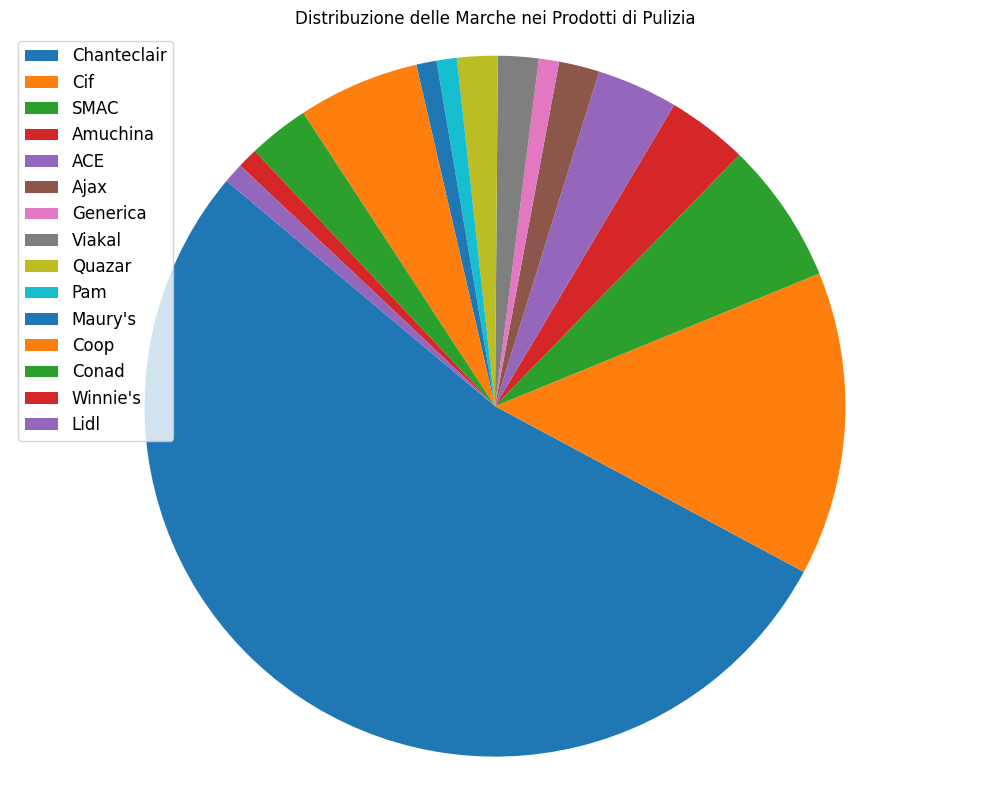

In [11]:
import matplotlib.pyplot as plt

# Funzione per creare e mostrare un grafico a torta per le marche
def crea_grafico_a_torta(df, variabili, nomi_marche, titolo):
    # Aggrega i valori per ciascuna marca
    valori_aggregati = df[variabili].sum()

    # Crea il grafico a torta
    plt.figure(figsize=(10, 8))  # Regola le dimensioni per una migliore visualizzazione
    patches, texts = plt.pie(valori_aggregati, startangle=140)

    plt.title(titolo)
    plt.axis('equal')  # Assicura che la torta sia disegnata come un cerchio

    # Crea una legenda con font più grande
    plt.legend(patches, nomi_marche, loc='upper left', fontsize='large')

    plt.tight_layout()
    plt.show()

# Nomi delle colonne nel DataFrame
variabili = [
    'Il primo marchio che hanno pensato è Chanteclair',
    'Il primo marchio che hanno pensato è Cif',
    'Il primo marchio che hanno pensato è SMAC',
    'Il primo marchio che hanno pensato è Amuchina',
    'Il primo marchio che hanno pensato è ACE',
    'Il primo marchio che hanno pensato è Ajax',
    'Il primo marchio che hanno pensato è quella generica dei supermercati',
    'Il primo marchio che hanno pensato è Viakal',   
    'Il primo marchio che hanno pensato è Quazar',
    'Il primo marchio che hanno pensato è Pam',
    'Il primo marchio che hanno pensato è Maury’s',
    'Il primo marchio che hanno pensato è Coop',
    'Il primo marchio che hanno pensato è Conad',
    'Il primo marchio che hanno pensato è Winnie’s',
    'Il primo marchio che hanno pensato è Lidl'
]

# Nomi delle marche da visualizzare nel grafico
nomi_marche = [
    'Chanteclair', "Cif", "SMAC", "Amuchina", "ACE", "Ajax", "Generica", "Viakal", "Quazar", "Pam", "Maury's", "Coop", "Conad", "Winnie's", "Lidl"
]

print(len(variabili) == len(nomi_marche))

# Chiamata alla funzione per creare il grafico a torta
crea_grafico_a_torta(df, variabili, nomi_marche, 'Distribuzione delle Marche nei Prodotti di Pulizia')


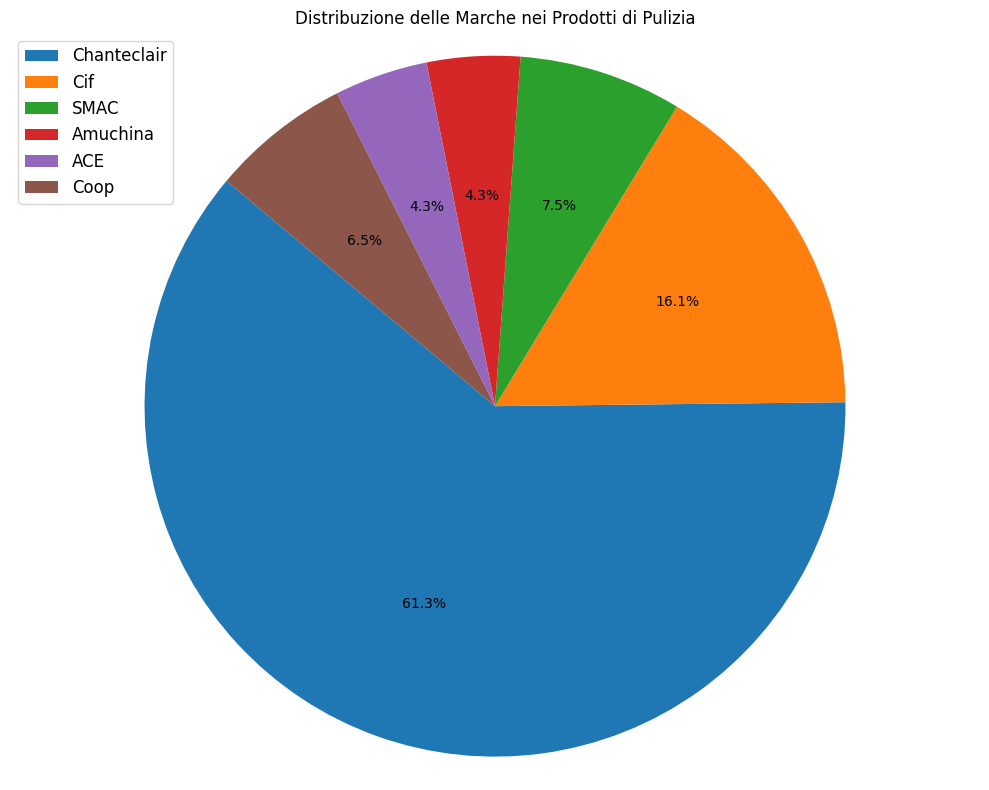

In [7]:
import matplotlib.pyplot as plt

# Funzione per creare e mostrare un grafico a torta con percentuali per le marche
def crea_grafico_a_torta(df, variabili, nomi_marche, titolo):
    # Aggrega i valori per ciascuna marca
    valori_aggregati = df[variabili].sum()

    # Crea il grafico a torta con percentuali
    plt.figure(figsize=(10, 8))  # Regola le dimensioni per una migliore visualizzazione
    patches, texts, autotexts = plt.pie(valori_aggregati, startangle=140, autopct='%1.1f%%')

    plt.title(titolo)
    plt.axis('equal')  # Assicura che la torta sia disegnata come un cerchio

    # Crea una legenda con font più grande
    plt.legend(patches, nomi_marche, loc='upper left', fontsize='large')

    plt.tight_layout()
    plt.show()

# Lista ridotta delle variabili da confrontare
variabili = [
    'Il primo marchio che hanno pensato è Chanteclair',
    'Il primo marchio che hanno pensato è Cif',
    'Il primo marchio che hanno pensato è SMAC',
    'Il primo marchio che hanno pensato è Amuchina',
    'Il primo marchio che hanno pensato è ACE',
    'Il primo marchio che hanno pensato è Coop'
]

# Nomi delle marche da visualizzare nel grafico
nomi_marche = [
    'Chanteclair', "Cif", "SMAC", "Amuchina", "ACE", 'Coop'
]

# Chiamata alla funzione per creare il grafico a torta
crea_grafico_a_torta(df, variabili, nomi_marche, 'Distribuzione delle Marche nei Prodotti di Pulizia')

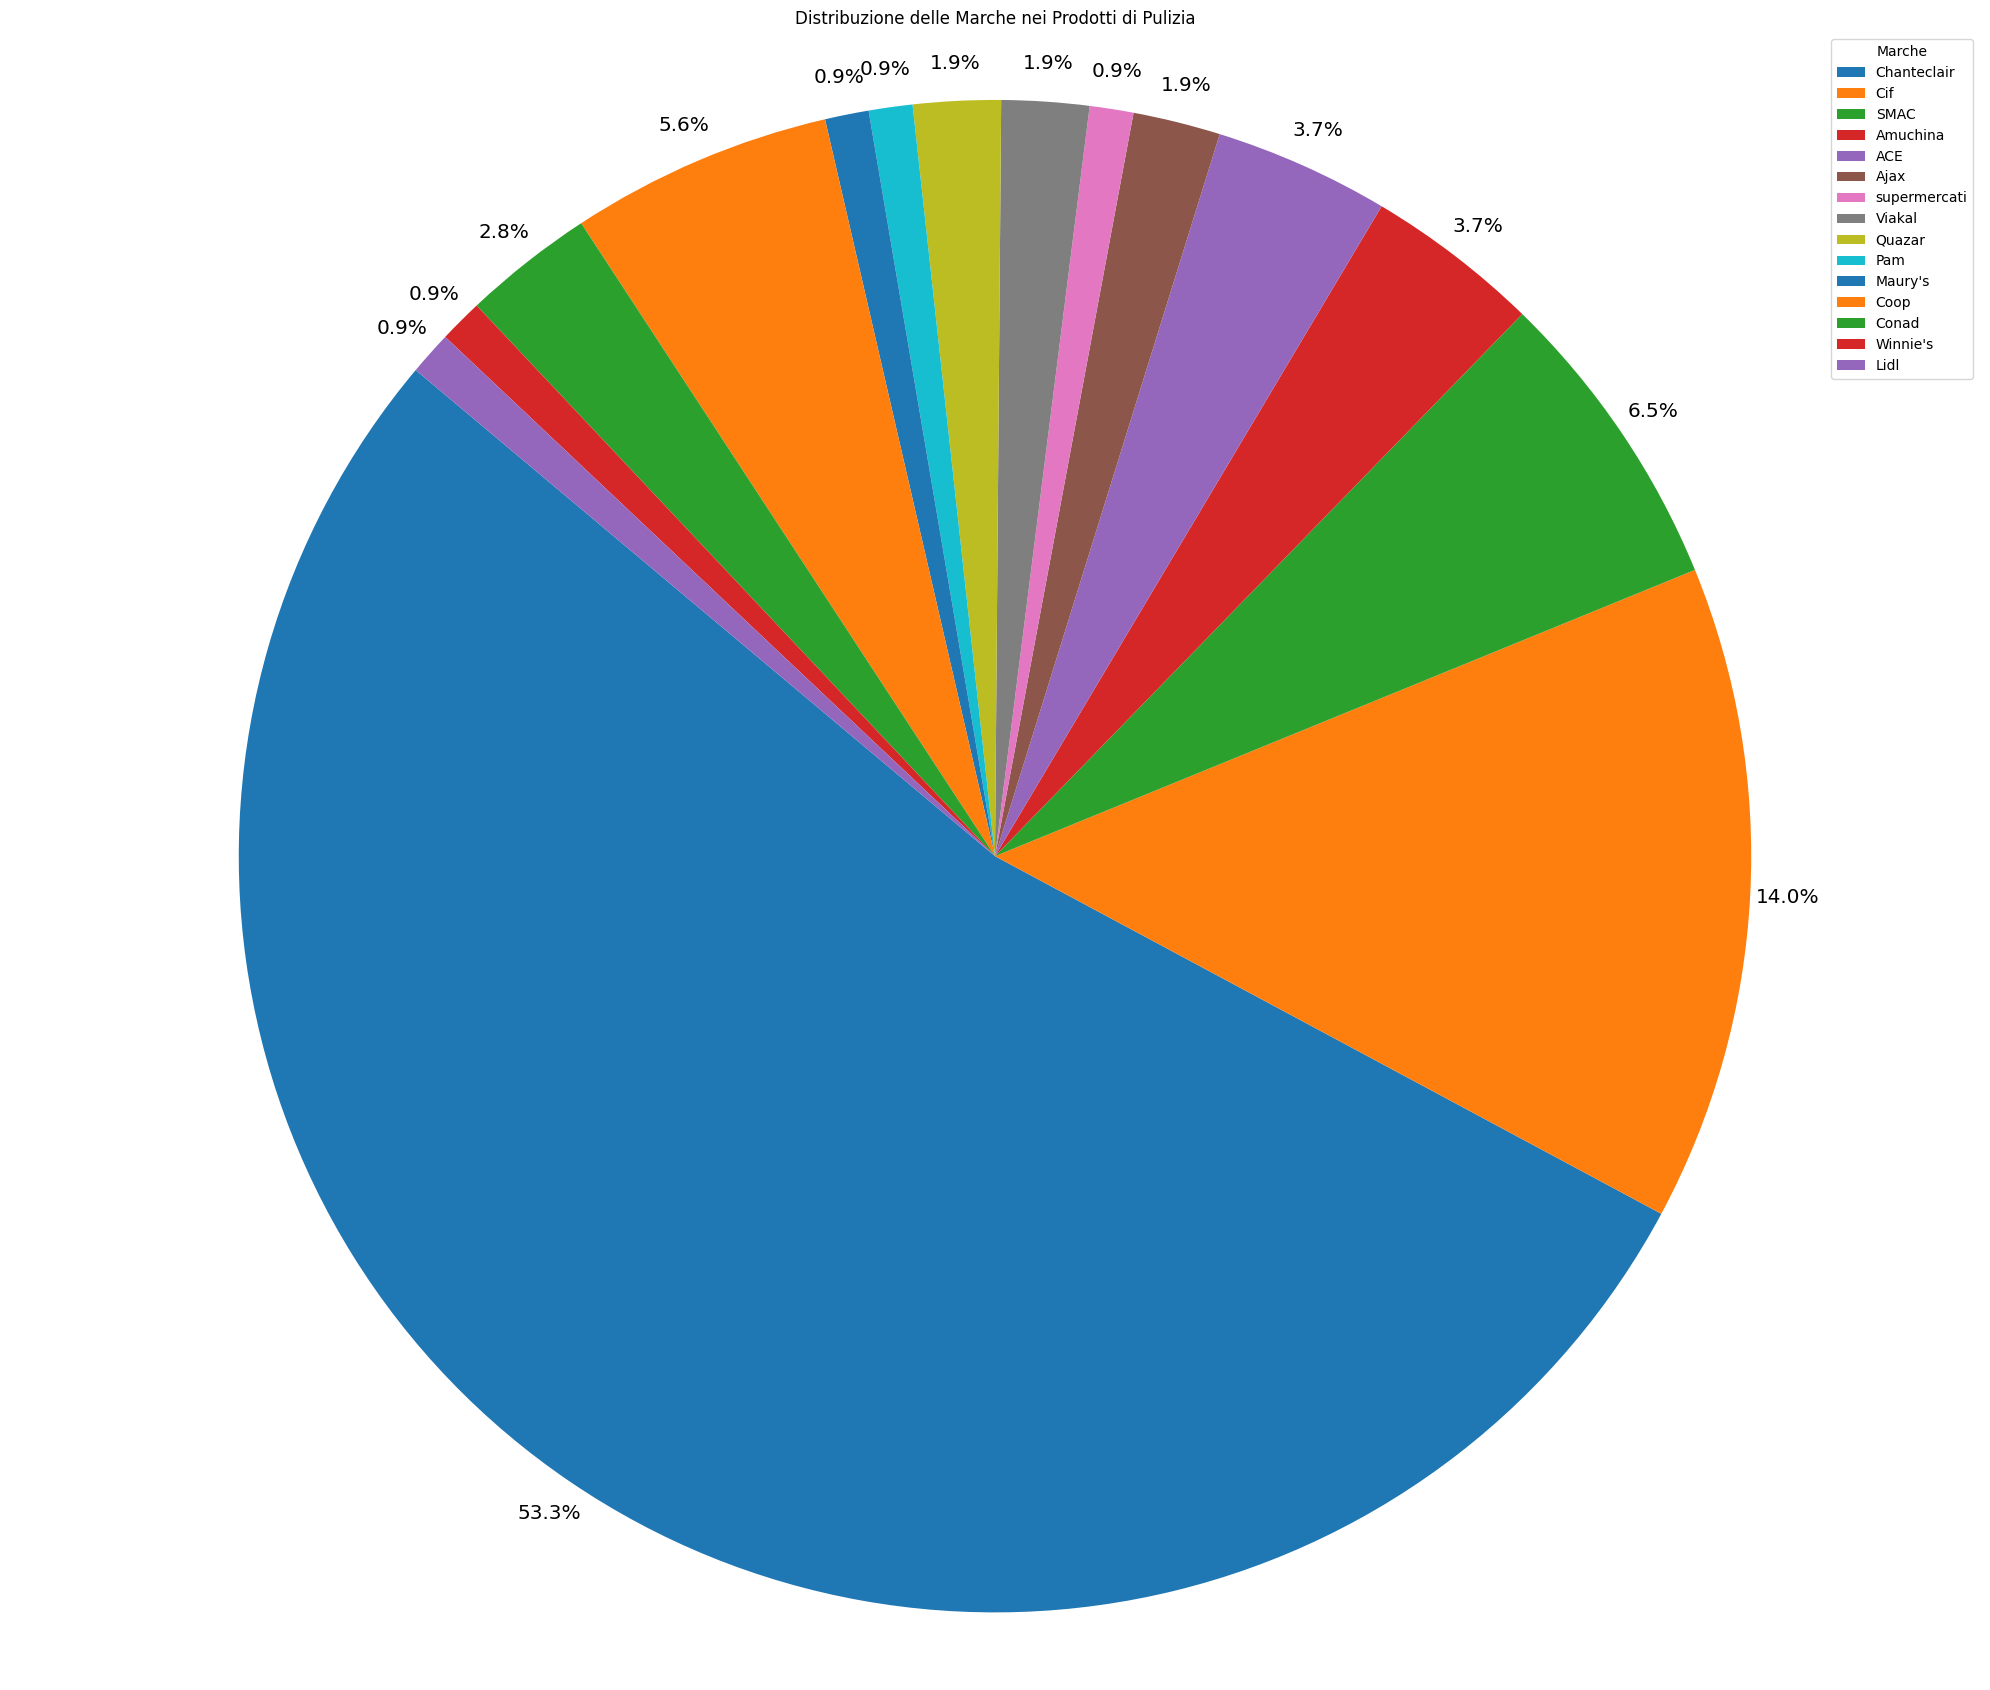

In [3]:
import matplotlib.pyplot as plt

# Funzione per creare e mostrare un grafico a torta con legenda
def crea_grafico_a_torta(df, variabili, nomi_marche, titolo):
    # Aggrega i valori per ciascuna marca
    valori_aggregati = df[variabili].sum()

    # Crea il grafico a torta
    plt.figure(figsize=(20, 17))  # Regola le dimensioni per una migliore visualizzazione
    patches, texts, autotexts = plt.pie(valori_aggregati, startangle=140, autopct='%1.1f%%', pctdistance=1.05)
    
    # Aumenta la dimensione del testo per le percentuali e spostale più lontano dal centro
    for autotext in autotexts:
        autotext.set_color('black')
        autotext.set_size('x-large')

    plt.legend(patches, nomi_marche, title="Marche", loc="best")
    plt.title(titolo)
    plt.axis('equal')  # Assicura che la torta sia disegnata come un cerchio
    plt.tight_layout()
    plt.show()

# Nomi delle colonne nel DataFrame
variabili = [
    'Il primo marchio che hanno pensato è Chanteclair',
    'Il primo marchio che hanno pensato è Cif',
    'Il primo marchio che hanno pensato è SMAC',
    'Il primo marchio che hanno pensato è Amuchina',
    'Il primo marchio che hanno pensato è ACE',
    'Il primo marchio che hanno pensato è Ajax',
    'Il primo marchio che hanno pensato è quella generica dei supermercati',
    'Il primo marchio che hanno pensato è Viakal',   
    'Il primo marchio che hanno pensato è Quazar',
    'Il primo marchio che hanno pensato è Pam',
    'Il primo marchio che hanno pensato è Maury’s',
    'Il primo marchio che hanno pensato è Coop',
    'Il primo marchio che hanno pensato è Conad',
    'Il primo marchio che hanno pensato è Winnie’s',
    'Il primo marchio che hanno pensato è Lidl'
]

# Nomi delle marche da visualizzare nel grafico
nomi_marche = [
    "Chanteclair", "Cif", "SMAC", "Amuchina", "ACE", "Ajax", "supermercati", "Viakal", "Quazar", "Pam", "Maury's", "Coop", "Conad", "Winnie's", "Lidl"
]

# Chiamata alla funzione per creare il grafico a torta
crea_grafico_a_torta(df, variabili, nomi_marche, 'Distribuzione delle Marche nei Prodotti di Pulizia')


In [ ]:
import matplotlib.pyplot as plt

# Funzione per creare e mostrare un grafico a torta con legenda
def crea_grafici_a_torta_per_righe(df, variabili, nomi_marche):
    for index, row in df.iterrows():
        # Estrai il valore della prima colonna per la riga corrente
        valore_prima_colonna = row.iloc[0]

        # Crea il grafico a torta per la riga corrente
        plt.figure(figsize=(8, 6))
        patches, texts, autotexts = plt.pie(row[variabili], startangle=140, autopct='%1.1f%%', pctdistance=1.07)

        # Aumenta la dimensione del testo per le percentuali
        for autotext in autotexts:
            autotext.set_color('black')
            autotext.set_size('x-large')

        plt.legend(patches, nomi_marche, title="Marche", loc="best")
        plt.title(f'Distribuzione delle Marche nei Prodotti di Pulizia per la {valore_prima_colonna}')
        plt.axis('equal')
        plt.tight_layout()
        plt.show()

# Nomi delle colonne nel DataFrame
variabili = [
    'Il primo marchio che hanno pensato è Chanteclair',
    'Il primo marchio che hanno pensato è Cif',
    'Il primo marchio che hanno pensato è SMAC',
    'Il primo marchio che hanno pensato è Amuchina',
    'Il primo marchio che hanno pensato è ACE',
    'Il primo marchio che hanno pensato è Ajax',
    'Il primo marchio che hanno pensato è quella generica dei supermercati',
    'Il primo marchio che hanno pensato è Viakal',   
    'Il primo marchio che hanno pensato è Quazar',
    'Il primo marchio che hanno pensato è Pam',
    'Il primo marchio che hanno pensato è Maury’s',
    'Il primo marchio che hanno pensato è Coop',
    'Il primo marchio che hanno pensato è Conad',
    'Il primo marchio che hanno pensato è Winnie’s',
    'Il primo marchio che hanno pensato è Lidl'
]

# Nomi delle marche da visualizzare nel grafico
nomi_marche = [
    "Chanteclair", "Cif", "SMAC", "Amuchina", "ACE", "Ajax", "supermercati", "Viakal", "Quazar", "Pam", "Maury's", "Coop", "Conad", "Winnie's", "Lidl"
]

# Chiamata alla funzione per creare i grafici a torta per ogni riga
crea_grafici_a_torta_per_righe(df, variabili, nomi_marche)

In [ ]:
import matplotlib.pyplot as plt

# Funzione per creare e mostrare un grafico a torta con legenda
def crea_grafici_a_torta_per_righe(df, variabili, nomi_marche):
    for index, row in df.iterrows():
        # Estrai il valore della prima colonna per la riga corrente
        valore_prima_colonna = row.iloc[0]

        # Crea il grafico a torta per la riga corrente
        plt.figure(figsize=(8, 6))
        patches, texts, autotexts = plt.pie(row[variabili], startangle=140, autopct='%1.1f%%', pctdistance=1.07)

        # Aumenta la dimensione del testo per le percentuali
        for autotext in autotexts:
            autotext.set_color('black')
            autotext.set_size('x-large')

        plt.legend(patches, nomi_marche, title="Marche", loc="best")
        plt.title(f'Distribuzione delle Marche nei Prodotti di Pulizia per la {valore_prima_colonna}')
        plt.axis('equal')
        plt.tight_layout()
        plt.show()

# Nomi delle colonne nel DataFrame
variabili = [
    'Il secondo marchio a cui hanno pensato è ACE',
    'Il secondo marchio a cui hanno pensato è Ajax',
    'Il secondo marchio a cui hanno pensato è Amuchina',
    'Il secondo marchio a cui hanno pensato è Chanteclair',
    'Il secondo marchio a cui hanno pensato è Cif',
    'Il secondo marchio a cui hanno pensato è Conad',
    'Il secondo marchio a cui hanno pensato è Coop',
    'Il secondo marchio a cui hanno pensato è Dixan',
    'Il secondo marchio a cui hanno pensato è Maury’s',
    'Il secondo marchio a cui hanno pensato è Napisan',
    'Il secondo marchio a cui hanno pensato è Pam',
    'Il secondo marchio a cui hanno pensato è Quazar',
    'Il secondo marchio a cui hanno pensato è Smac',
    'Il secondo marchio a cui hanno pensato è quella generica dei supermercati',
    'Il secondo marchio a cui hanno pensato è Vetril',
    'Il secondo marchio a cui hanno pensato è Viakal',
    'Il secondo marchio a cui hanno pensato è Winnie’s'
]

# Nomi delle marche da visualizzare nel grafico
nomi_marche = [
    "ACE", "Ajax", "Amuchina", "Chanteclair", "Cif", "Conad", "Coop", "Dixan", "Maury's", "Napisan", "Pam", "Quazar", "Smac", "supermercati", "Vetril", "Viakal", "Winnie's"
]

# Chiamata alla funzione per creare i grafici a torta per ogni riga
crea_grafici_a_torta_per_righe(df, variabili, nomi_marche)

In [ ]:
import matplotlib.pyplot as plt

# Funzione per creare e mostrare un grafico a torta con legenda
def crea_grafici_a_torta_per_righe(df, variabili, nomi_marche):
    for index, row in df.iterrows():
        # Estrai il valore della prima colonna per la riga corrente
        valore_prima_colonna = row.iloc[0]

        # Crea il grafico a torta per la riga corrente
        plt.figure(figsize=(8, 6))
        patches, texts, autotexts = plt.pie(row[variabili], startangle=140, autopct='%1.1f%%', pctdistance=1.07)

        # Aumenta la dimensione del testo per le percentuali
        for autotext in autotexts:
            autotext.set_color('black')
            autotext.set_size('x-large')

        plt.legend(patches, nomi_marche, title="Marche", loc="best")
        plt.title(f'Distribuzione delle Marche nei Prodotti di Pulizia per la {valore_prima_colonna}')
        plt.axis('equal')
        plt.tight_layout()
        plt.show()

# Nomi delle colonne nel DataFrame
variabili = [
    'Il terzo marchio a cui hanno pensato è Ace',
       'Il terzo marchio a cui hanno pensato è Ajax',
       'Il terzo marchio a cui hanno pensato è Vetril',
       'Il terzo marchio a cui hanno pensato è Maury’s',
       'Il terzo marchio a cui hanno pensato è Conad',
       'Il terzo marchio a cui hanno pensato è Cif',
       'Il terzo marchio a cui hanno pensato è Coop',
       'Il terzo marchio a cui hanno pensato è Lysoform',
       'Il terzo marchio a cui hanno pensato è Quazar',
       'Il terzo marchio a cui hanno pensato è Chanteclair',
       'Il terzo marchio a cui hanno pensato è Vert',
       'Il terzo marchio a cui hanno pensato è Smac',
       'Il terzo marchio a cui hanno pensato è Lidl',
       'Il terzo marchio a cui hanno pensato è Esselunga',
       'Il terzo marchio a cui hanno pensato è Amuchina',
       'Il terzo marchio a cui hanno pensato è Bref',
       'Il terzo marchio a cui hanno pensato è Viakal'
]

# Nomi delle marche da visualizzare nel grafico
nomi_marche = [
    "Ace", "Ajax", "Vetril", "Maury's", "Conad", "Cif", "Coop", "Lysoform", "Quazar", "Chanteclair", "Vert", "Smac", "Lidl", "Esselunga", "Amuchina", "Bref", "Viakal"
]

# Chiamata alla funzione per creare i grafici a torta per ogni riga
crea_grafici_a_torta_per_righe(df, variabili, nomi_marche)

Qui Compilo le liste

In [131]:
import pandas as pd

# Funzione per scrivere le proporzioni per generazione in un file di testo
def scrivi_proporzioni_per_generazione_in_file(df, variabili, nomi_marche, nome_file):
    with open(nome_file, 'a') as file:  # Apri il file in modalità di append ('a')
        for index, row in df.iterrows():
            # Estrai il nome della generazione dalla prima colonna
            generazione = row.iloc[0]
            file.write(f"\nProporzioni per la Generazione: {generazione}\n")

            # Calcola la somma totale per la riga corrente
            totale_riga = row[variabili].sum()

            # Calcola e scrivi la proporzione per ciascuna marca
            for variabile, nome_marca in zip(variabili, nomi_marche):
                somma_marca = row[variabile]
                proporzione = somma_marca / totale_riga * 100 if totale_riga != 0 else 0
                file.write(f"{nome_marca}: {proporzione:.2f}%\n")

# Nomi delle colonne nel DataFrame (sostituisci con i tuoi dati reali)
variabili = [
    'Il primo marchio che hanno pensato è Chanteclair',
    'Il primo marchio che hanno pensato è Cif',
    'Il primo marchio che hanno pensato è SMAC',
    'Il primo marchio che hanno pensato è Amuchina',
    'Il primo marchio che hanno pensato è ACE',
    'Il primo marchio che hanno pensato è Ajax',
    'Il primo marchio che hanno pensato è quella generica dei supermercati',
    'Il primo marchio che hanno pensato è Viakal',
    'Il primo marchio che hanno pensato è Quazar',
    'Il primo marchio che hanno pensato è Pam',
    'Il primo marchio che hanno pensato è Maury’s',
    'Il primo marchio che hanno pensato è Coop',
    'Il primo marchio che hanno pensato è Conad',
    'Il primo marchio che hanno pensato è Winnie’s',
    'Il primo marchio che hanno pensato è Lidl'
]

# Nomi delle marche da visualizzare nel file (sostituisci con i tuoi dati reali)
nomi_marche = [
    "Chanteclair", "Cif", "SMAC", "Amuchina", "ACE", "Ajax", "supermercati", "Viakal", "Quazar", "Pam", "Maury's", "Coop", "Conad", "Winnie's", "Lidl"
    ]


# Nome del file in cui scrivere le proporzioni
nome_file = "/Users/peppus00/Desktop/Progetto ARM/Analisi dati/tabelle_proporzioni_1.txt"

# Chiamata alla funzione
scrivi_proporzioni_per_generazione_in_file(df, variabili, nomi_marche, nome_file)


In [132]:
import pandas as pd

# Funzione per scrivere le proporzioni per generazione in un file di testo
def scrivi_proporzioni_per_generazione_in_file(df, variabili, nomi_marche, nome_file):
    with open(nome_file, 'a') as file:  # Apri il file in modalità di append ('a')
        for index, row in df.iterrows():
            # Estrai il nome della generazione dalla prima colonna
            generazione = row.iloc[0]
            file.write(f"\nProporzioni per la Generazione: {generazione}\n")

            # Calcola la somma totale per la riga corrente
            totale_riga = row[variabili].sum()

            # Calcola e scrivi la proporzione per ciascuna marca
            for variabile, nome_marca in zip(variabili, nomi_marche):
                somma_marca = row[variabile]
                proporzione = somma_marca / totale_riga * 100 if totale_riga != 0 else 0
                file.write(f"{nome_marca}: {proporzione:.2f}%\n")

# Nomi delle colonne nel DataFrame (sostituisci con i tuoi dati reali)
variabili = [
    'Il secondo marchio a cui hanno pensato è ACE',
       'Il secondo marchio a cui hanno pensato è Ajax',
       'Il secondo marchio a cui hanno pensato è Amuchina',
       'Il secondo marchio a cui hanno pensato è Chanteclair',
       'Il secondo marchio a cui hanno pensato è Cif',
       'Il secondo marchio a cui hanno pensato è Conad',
       'Il secondo marchio a cui hanno pensato è Coop',
       'Il secondo marchio a cui hanno pensato è Dixan',
       'Il secondo marchio a cui hanno pensato è Maury’s',
       'Il secondo marchio a cui hanno pensato è Napisan',
       'Il secondo marchio a cui hanno pensato è Pam',
       'Il secondo marchio a cui hanno pensato è Quazar',
       'Il secondo marchio a cui hanno pensato è Smac',
       'Il secondo marchio a cui hanno pensato è quella generica dei supermercati',
       'Il secondo marchio a cui hanno pensato è Vetril',
       'Il secondo marchio a cui hanno pensato è Viakal',
       'Il secondo marchio a cui hanno pensato è Winnie’s'
]

# Nomi delle marche da visualizzare nel file (sostituisci con i tuoi dati reali)
nomi_marche = [
    "ACE", "Ajax", "Amuchina", "Chanteclair", "Cif", "Conad", "Coop", "Dixan", "Maury's", "Napisan", "Pam", "Quazar", "Smac", "supermercati", "Vetril", "Viakal", "Winnie's"
    ]


# Nome del file in cui scrivere le proporzioni
nome_file = "/Users/peppus00/Desktop/Progetto ARM/Analisi dati/tabelle_proporzioni_2.txt"

# Chiamata alla funzione
scrivi_proporzioni_per_generazione_in_file(df, variabili, nomi_marche, nome_file)


In [133]:
import pandas as pd

# Funzione per scrivere le proporzioni per generazione in un file di testo
def scrivi_proporzioni_per_generazione_in_file(df, variabili, nomi_marche, nome_file):
    with open(nome_file, 'a') as file:  # Apri il file in modalità di append ('a')
        for index, row in df.iterrows():
            # Estrai il nome della generazione dalla prima colonna
            generazione = row.iloc[0]
            file.write(f"\nProporzioni per la Generazione: {generazione}\n")

            # Calcola la somma totale per la riga corrente
            totale_riga = row[variabili].sum()

            # Calcola e scrivi la proporzione per ciascuna marca
            for variabile, nome_marca in zip(variabili, nomi_marche):
                somma_marca = row[variabile]
                proporzione = somma_marca / totale_riga * 100 if totale_riga != 0 else 0
                file.write(f"{nome_marca}: {proporzione:.2f}%\n")

# Nomi delle colonne nel DataFrame (sostituisci con i tuoi dati reali)
variabili = [
    'Il terzo marchio a cui hanno pensato è Ace',
       'Il terzo marchio a cui hanno pensato è Ajax',
       'Il terzo marchio a cui hanno pensato è Vetril',
       'Il terzo marchio a cui hanno pensato è Maury’s',
       'Il terzo marchio a cui hanno pensato è Conad',
       'Il terzo marchio a cui hanno pensato è Cif',
       'Il terzo marchio a cui hanno pensato è Coop',
       'Il terzo marchio a cui hanno pensato è Lysoform',
       'Il terzo marchio a cui hanno pensato è Quazar',
       'Il terzo marchio a cui hanno pensato è Chanteclair',
       'Il terzo marchio a cui hanno pensato è Vert',
       'Il terzo marchio a cui hanno pensato è Smac',
       'Il terzo marchio a cui hanno pensato è Lidl',
       'Il terzo marchio a cui hanno pensato è Esselunga',
       'Il terzo marchio a cui hanno pensato è Amuchina',
       'Il terzo marchio a cui hanno pensato è Bref',
       'Il terzo marchio a cui hanno pensato è Viakal'
]

# Nomi delle marche da visualizzare nel file (sostituisci con i tuoi dati reali)
nomi_marche = [
    "Ace", "Ajax", "Vetril", "Maury's", "Conad", "Cif", "Coop", "Lysoform", "Quazar", "Chanteclair", "Vert", "Smac", "Lidl", "Esselunga", "Amuchina", "Bref", "Viakal"
    ]


# Nome del file in cui scrivere le proporzioni
nome_file = "/Users/peppus00/Desktop/Progetto ARM/Analisi dati/tabelle_proporzioni_3.txt"

# Chiamata alla funzione
scrivi_proporzioni_per_generazione_in_file(df, variabili, nomi_marche, nome_file)


PROVO  A FARE CLUSTERIZZAZIONE

In [180]:
df = pd.read_csv('/Users/peppus00/Desktop/Progetto ARM/Analisi dati/interviste_trasposte_prova2.csv', sep=',')

In [181]:
# Supponendo che il DataFrame df sia già definito e disponibile

# Lista delle colonne da mantenere
colonne_da_mantenere = [
    'Età: generazioni', 'Sesso', 'NOTE - binary', '12 - binary', '10 - binary',
    '9 - binary_specifico_universale', '9 - binary_candeggina', '9 - risciacquo',
    '8 - binary_offerte', '8 - binary_cambia_prodotto', '5 - terza_caratteristica',
    '5 - seconda_caratteristica', '5 - caratteristica_preferita', '4 - cambierei',
    'Marchi_Trovati_1', 'Marchi_Trovati_2', 'Marchi_Trovati_3', 'Marchi_Trovati_4',
]

# Ora puoi usare questa lista per filtrare il DataFrame
df = df[colonne_da_mantenere]

# Ottenere i nomi delle colonne basandosi sugli indici
nome_colonna_3 = df.columns[2]  # Indice 2 per la terza colonna
nome_colonna_9 = df.columns[8]  # Indice 8 per la nona colonna

# Aggiungi questi nomi alla tua lista di colonne da mantenere
colonne_da_mantenere.extend([nome_colonna_3, nome_colonna_9])

# Ora puoi usare questa lista per filtrare il DataFrame
df_filtrato_testuale = df[colonne_da_mantenere]

df.head()  # Visualizza le prime righe del DataFrame

df.to_csv('/Users/peppus00/Desktop/Progetto ARM/Analisi dati/interviste_trasposte_prova_pulito.csv', index=False)

In [171]:
# Codifica delle frequenze
for colonna in ['Marchi_Trovati_1', 'Marchi_Trovati_2', 'Marchi_Trovati_3', 'Marchi_Trovati_4']:
    frequenze = df[colonna].value_counts(normalize=True)
    df[colonna] = df[colonna].map(frequenze)

# Ora ciascuna colonna contiene la frequenza della categoria invece del nome

In [182]:
df.head()  # Visualizza le prime righe del DataFrame

,Età: generazioni,Sesso,NOTE - binary,12 - binary,10 - binary,9 - binary_specifico_universale,9 - binary_candeggina,9 - risciacquo,8 - binary_offerte,8 - binary_cambia_prodotto,5 - terza_caratteristica,5 - seconda_caratteristica,5 - caratteristica_preferita,4 - cambierei,Marchi_Trovati_1,Marchi_Trovati_2,Marchi_Trovati_3,Marchi_Trovati_4
0,2.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,3,1,2,0,Chanteclair,Ace,NaN,NaN
1,0.0,0.0,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,1,3,2,1,Conad,NaN,NaN,NaN
2,0.0,1.0,0.0,0.0,1.0,1.0,NaN,1.0,0.0,1.0,3,2,1,1,Smac,Chanteclair,NaN,NaN
3,1.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0,0.0,0.0,2,3,1,0,Chanteclair,Ajax,Coop,NaN
4,1.0,0.0,0.0,0.0,1.0,0.0,NaN,1.0,1.0,1.0,3,1,2,1,Amuchina,Coop,Chanteclair,NaN


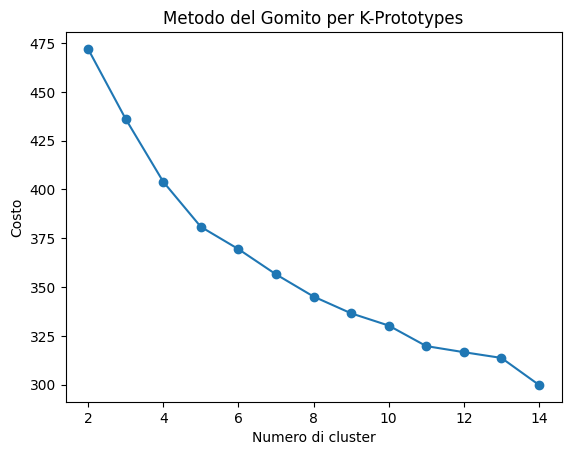

In [183]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from kmodes.kprototypes import KPrototypes

# Per le colonne numeriche, sostituisci NaN con la media (o un altro valore a scelta)
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    df[col] = df[col].fillna(df[col].mean())

# Per le colonne categoriche, usa un placeholder come 'Non specificato'
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna('Non specificato')

# Procedi con la codifica one-hot delle colonne categoriche
one_hot_encoded_df = pd.get_dummies(df)

# Converti il DataFrame in un array numpy per l'uso con KPrototypes
data = one_hot_encoded_df.values

# Troviamo il numero ottimale di cluster usando KPrototypes
cost = []
for num_clusters in range(2, 15):
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao')
    kproto.fit_predict(data, categorical=[one_hot_encoded_df.columns.get_loc(col) for col in numeric_cols])
    cost.append(kproto.cost_)

# Visualizza il grafico del costo per determinare il numero ottimale di cluster
plt.plot(range(2, 15), cost, marker='o')
plt.xlabel('Numero di cluster')
plt.ylabel('Costo')
plt.title('Metodo del Gomito per K-Prototypes')
plt.show()

In [184]:
# Esegui K-Prototypes con il numero ottimale di cluster
kproto = KPrototypes(n_clusters=5, init='Cao')
clusters = kproto.fit_predict(data)

# Aggiungi le etichette dei cluster al DataFrame originale
df['Cluster'] = clusters

df.groupby('Cluster').mean()

NotImplementedError: No categorical data selected, effectively doing k-means. Present a list of categorical columns, or use scikit-learn's KMeans instead.